In [60]:


import numpy as np
import matplotlib.path as mpltPath
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point


inTxt = 'filepath for point cloud txt'
inTxt
headers = ['x','y','z']
df = pd.read_csv(inTxt,delimiter=",",header=None,names=headers)


hell0 wrodl


In [2]:
gdf = gpd.GeoDataFrame(
    df.drop(['x', 'y'], axis=1),
    crs={'init': 'epsg:3879'},
    geometry=[Point(xy) for xy in zip(df.x, df.y)])

C:\python\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [61]:
from shapely.geometry import Polygon

xmin,ymin,xmax,ymax =  gdf.total_bounds
length = 1
wide = 1

cols = list(np.arange(xmin, xmax + wide, wide))
rows = list(np.arange(ymin, ymax + length, length))

polygons = []
for x in cols[:-1]:
    for y in rows[:-1]:
        polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)]))

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grid.shp")
#grid = gpd.read_file('grid_fix.shp')


In [64]:
#grid = gpd.GeoDataFrame({'geometry':polygons},crs={'init': 'epsg:3879'})
gdf.to_crs('epsg:3879')
points_merged = gpd.sjoin(gdf, grid, how="inner", op='within')
grid.to_file("points_merged.shp")

ipykernel_launcher:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:3879 +type=crs
Right CRS: EPSG:3879



In [66]:
points_merged.to_file("points_merged.shp")

ipykernel_launcher:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


In [28]:
points = points_merged.loc[points_merged['index_right'] == 2]
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.decomposition import PCA
import math 
values = [[x,y,z] for x,y,z in zip(points['geometry'].x , points['geometry'].y,points['z'])]
X = np.array(values,np.longdouble)
centroid = np.mean(X, axis=0)
d = math.sqrt((centroid[0]**2)+(centroid[1]**2)+(centroid[2]**2))

# Function to find distance 
def shortest_distance(x1, y1, z1, a, b, c, d):   
    print(x1, y1, z1, a, b, c, d)
    de = abs((a * x1 + b * y1 + c * z1 + d))  
    print(de)
    e = (math.sqrt(a * a + b * b + c * c)) 
    print(e)
    distance = de/e
    print("Perpendicular distance is", distance) 
    return distance 
error_sum = 0
for value in values:   
    
    # Function call 
    error_sum = error_sum +  shortest_distance(value[0], value[1], value[2],        centroid[0], centroid[1], centroid[2], d)  
rmse = np.sqrt(np.mean((error_sum)**2))  
print(rmse) 


25498000.049000002 6677002.006 26.816 25498000.46154545 6677002.485303029 26.83206060606061 26357738.70661963
694730402364781.5
26357738.70661963
Perpendicular distance is 26357739.186112463
25498000.005 6677002.125 26.816 25498000.46154545 6677002.485303029 26.83206060606061 26357738.70661963
694730402037432.8
26357738.70661963
Perpendicular distance is 26357739.17369301
25498000.401 6677002.948 26.816 25498000.46154545 6677002.485303029 26.83206060606061 26357738.70661963
694730417629813.9
26357738.70661963
Perpendicular distance is 26357739.76526049
25498000.444000002 6677002.829 26.826 25498000.46154545 6677002.485303029 26.83206060606061 26357738.70661963
694730417931665.0
26357738.70661963
Perpendicular distance is 26357739.776712578
25498000.488 6677002.71 26.826 25498000.46154545 6677002.485303029 26.83206060606061 26357738.70661963
694730418259013.8
26357738.70661963
Perpendicular distance is 26357739.789132033
25498000.542 6677002.592 26.826 25498000.46154545 6677002.48530302

In [22]:

def shortest_distance(x1, y1, z1, a, b, c, d):   
    print(x1, y1, z1, a, b, c, d)
    de = abs(((a * x1) + (b * y1) + (c * z1) + d))  
    print(de)
    e = (math.sqrt(a * a + b * b + c * c)) 
    print(e)
    distance = de/e
    print("Perpendicular distance is", distance) 
    return distance 
d = math.sqrt((3**2)+(3**2)+(3**2))
shortest_distance(4,-4,3, 2,-2,5,8)

4 -4 3 2 2 5 8
23
5.744562646538029
Perpendicular distance is 4.003786086981051


4.003786086981051

In [16]:
values
#25498000.569516126 6677456.499677419 22.814935483870972 26357853.82668038

[[25498000.772, 6677456.992000001, 23.113000000000003],
 [25498000.816, 6677456.842999999, 23.013],
 [25498000.85, 6677456.714, 22.973000000000003],
 [25498000.894, 6677456.585, 22.943],
 [25498000.928000003, 6677456.456, 22.923000000000002],
 [25498000.972, 6677456.328, 22.883000000000003],
 [25498000.52, 6677456.044, 22.673000000000002],
 [25498000.485999998, 6677456.163, 22.693],
 [25498000.443000004, 6677456.282000001, 22.723000000000003],
 [25498000.399, 6677456.41, 22.743000000000002],
 [25498000.365, 6677456.539, 22.773000000000003],
 [25498000.321, 6677456.668, 22.803],
 [25498000.286999997, 6677456.797, 22.833000000000002],
 [25498000.243, 6677456.916, 22.853],
 [25498000.395, 6677456.881, 22.883000000000003],
 [25498000.439, 6677456.752, 22.833000000000002],
 [25498000.472, 6677456.632999999, 22.823],
 [25498000.516, 6677456.494, 22.803],
 [25498000.56, 6677456.365, 22.783],
 [25498000.604000002, 6677456.246, 22.753],
 [25498000.648000002, 6677456.128, 22.743000000000002],
 [

In [46]:
#for i, x in grid.iterrows():
points = points_merged.loc[points_merged['index_right'] == 1]
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.decomposition import PCA
np.set_printoptions(precision=20)
pca = PCA(n_components=3)
values = [[x,y,z] for x,y,z in zip(points['geometry'].x , points['geometry'].y,points['z'])]

X = np.array(values,np.longdouble)


pca.fit(values)
eig_vec = pca.components_









    

In [23]:
df1 = pd.DataFrame(X, columns = ['x','y','z'])
df1['z'].max()



23.113000000000003

[ 0.9212081714686757    0.3884673356830856   -0.021647954328853237]
[2.5498000643620003e+07 6.6770015008800020e+06 2.7893200000000007e+01]
-26082762.928584397


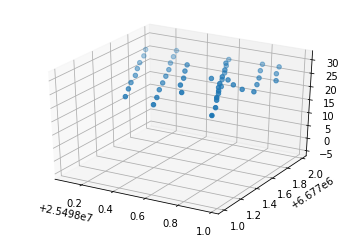

In [47]:

# [0.90946569 0.08816839 0.00236591]
# Percentage of variance explain by last vector is less 0.2%

# This is the normal vector of minimum variance
normal = eig_vec[2, :]  # (a, b, c)
centroid = np.mean(X, axis=0)
print(normal)
print(centroid)
# Every point (x, y, z) on the plane should satisfy a*x+b*y+c*z = d
# Taking centroid as a point on the plane
d = -centroid.dot(normal)
print(d)

# Draw plane
xx, yy = np.meshgrid(np.arange(np.min(X[:, 0]), np.max(X[:, 0])), np.arange(np.min(X[:, 1]), np.max(X[:, 1])))
z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z)
plt3d.scatter(*(X.T)) 

plt.show()

In [58]:
import math 
  
# Function to find distance 
def shortest_distance(x1, y1, z1, a, b, c, d):   
    de = abs((a * x1 + b * y1 + c * z1 + d))  
    e = (math.sqrt(a * a + b * b + c * c)) 
    distance = de/e
    print("Perpendicular distance is", distance) 
    return distance 
error_sum = 0
for value in values:   
    
    # Function call 
    error_sum = error_sum +  (shortest_distance(value[0], value[1], value[2], normal[0], normal[1], normal[2], d)**2)  
    print(error_sum)
rmse = np.sqrt(error_sum/(len(values)-1))  
print(rmse) 


Perpendicular distance is 0.35141280293464655
0.12349095806638473
Perpendicular distance is 0.35012455284595484
0.24607816057196455
Perpendicular distance is 0.3489197194576263
0.3678231311983532
Perpendicular distance is 0.3393405936658382
0.4829751697078367
Perpendicular distance is 0.3419370129704475
0.5998960905469887
Perpendicular distance is 0.340515699237585
0.7158470319742501
Perpendicular distance is 0.33136953413486475
0.8256528001270075
Perpendicular distance is 0.33374947309494013
0.9370415109181577
Perpendicular distance is 0.00587160140275955
0.9370759866211905
Perpendicular distance is 0.3342545926570892
1.048802119333547
Perpendicular distance is 0.1186489015817642
1.0628796811801062
Perpendicular distance is 0.3285601362586021
1.1708314443183774
Perpendicular distance is 0.16303610429167745
1.197412215620984
Perpendicular distance is 0.3277601338922977
1.304838920990081
Perpendicular distance is 0.22674152627587313
1.3562506407279935
Perpendicular distance is 0.3222376

In [8]:
import math
angle = math.acos(([0,0,1]@normal)/(np.sqrt((normal[0]*normal[0])+(normal[1]*normal[1])+(normal[2]*normal[2]))*(np.sqrt((0*0)+(0*0)+(1*1)))))

In [10]:
grid['angle'] = 9999.9999999
grid.at[450,'angle'] = np.degrees(angle)

In [3]:
from owslib.wms import WebMapService
>>> wms = WebMapService('https://kartta.hel.fi/ws/geoserver/avoindata/wms', version='1.1.1')


In [34]:
img = wms.getmap(   layers=['avoindata:Ortoilmakuva_2017_20cm'],
                    srs='EPSG:3879',
                    bbox=(xmin,ymin,xmax,ymax),
                    size = (2000,2000),
                    format='image/geotiff'




                    )           

In [35]:
out = open('filepath', 'wb')
out.write(img.read())

12002380

In [95]:
import rasterio

from rasterio.plot import show

from rasterstats import zonal_stats
from io import BytesIO
grid_join = 0
with rasterio.open(BytesIO(img.read())) as r:
    for i in range(1,4):
        print(i)
        array = r.read(i)
        affine = r.transform
        grid_join = grid.join(
        pd.DataFrame(
            zonal_stats(grid['geometry'], array, affine=affine, stats=['min', 'max', 'mean', 'median', 'majority'])
            ),
            how='left'
        )
        grid_join = grid_join.rename({'majority': ('majority_'+ str(i)), 
            'max': ('max_'+ str(i)),
            'mean': ('mean_'+ str(i)),
            'median': ('median_'+ str(i)),
            'min': ('min_'+ str(i))
            }, axis='columns')
        

grid_join.to_file("grid_join_test.shp")
    
    
    

SyntaxError: invalid syntax (<ipython-input-95-9c8297f271a7>, line 9)

In [4]:
import geopandas as gpd
i_grid = gpd.read_file('grid_image.shp')

In [43]:
i_grid.head()
import colorsys

def rgb_to_hsv(s):
    colors = colorsys.rgb_to_hsv(s['mean_1']/255,s['mean_2']/255,s['mean_3']/255)
    s['h'] = colors[0]*255
    s['s'] = colors[1]*255
    s['v'] = colors[2]*255
    return s
i_grid = i_grid.apply(rgb_to_hsv, axis=1)

In [58]:
i_grid['green'] = 0
i_grid.loc[(i_grid['angle'] < 135) & (i_grid['angle'] > 45), 'green'] = 1
i_grid.loc[(i_grid['rmse'] > 1), 'green'] = 2
i_grid.loc[((i_grid['h'] >= 212.5) | (i_grid['h'] <= 127.5)) &(i_grid['s'] >= 32) & (i_grid['v'] <= 144) , 'green'] = 3
i_grid.loc[(i_grid['rmse'] > 1) & (i_grid['angle'] < 135) & (i_grid['angle'] > 45), 'green'] = 4
i_grid.loc[(i_grid['h'] >= 212.5) | (i_grid['h'] <= 127.5) &(i_grid['s'] >= 32) & (i_grid['v'] <= 144) & (i_grid['angle'] < 135) & (i_grid['angle'] > 45), 'green'] = 5
i_grid.loc[(i_grid['rmse'] > 1) & (((i_grid['h'] >= 212.5) | (i_grid['h'] <= 127.5)) &(i_grid['s'] >= 32) & (i_grid['v'] <= 144)) , 'green'] = 6
i_grid.loc[(i_grid['rmse'] > 1) & (((i_grid['h'] >= 212.5) | (i_grid['h'] <= 127.5)) &(i_grid['s'] >= 32) & (i_grid['v'] <= 144)) & (i_grid['angle'] < 135) & (i_grid['angle'] > 45) , 'green'] = 7

In [59]:
i_grid.to_file('hsv_test/greentest.shp')